## Student Performance Indicator

##### Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement

- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2) Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

##### 2.1 Import Data and Required Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Import the CSV Data as Pandas DataFrame

In [3]:
df=pd.read_csv('StudentsPerformance.csv')

##### Top five row

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Bottom five rows

In [5]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


#### Shape of data sets

In [6]:
df.shape

(1000, 8)

#### 2.2 Dataset information


- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

##### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 3.1 Check Missing values

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### 3.2 Check Duplicates

In [8]:
df.duplicated().sum()

0

##### 3.4 Check data type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### 3.5 Check the number of unique values of each column

In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

##### 3.6 Check statistics of data set

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insight
 - From above description of numerical data, all means are very close to each other - between 66 and 68.05;
 - All standard deviations are also close - between 14.6 and 15.19;
 - While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

#### 3.7 Exploring Categorical Data

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
print('categories in gender column', end=" ")
print(df['gender'].unique())

print('categories in race/ethnicity column ', end=" ")
print(df['race/ethnicity'].unique())

print('cotegories in parental leve of education column ', end=" ")
print(df['parental level of education'].unique())

print('categories in lunch column ', end=" ")
print(df['lunch'].unique())

print('categories in test prepatation course', end=" ")
print(df['test preparation course'].unique())

categories in gender column ['female' 'male']
categories in race/ethnicity column  ['group B' 'group C' 'group A' 'group D' 'group E']
cotegories in parental leve of education column  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch column  ['standard' 'free/reduced']
categories in test prepatation course ['none' 'completed']


In [14]:
 # define numerical and categorical columns

numerical_columns=df.describe().columns
categorical_columns=[i for i in df.columns if df[i].dtype=='O']


print('we have {} numberical features {}'.format(len(numerical_columns),numerical_columns))
print('we have {} categorical feature {}'. format(len(categorical_columns),categorical_columns))

we have 3 numberical features Index(['math score', 'reading score', 'writing score'], dtype='object')
we have 5 categorical feature ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### 3.8 Adding columns for "Total Score" and "Average"

In [15]:
df['total_score']=df['math score']+df['reading score']+df['writing score']

df['average_score']=df['total_score']/3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_marks=df[df['reading score']==100]['average_score'].count()
math_marks=df[df['math score']==100]['average_score'].count()
writing_marks=df[df['writing score']==100]['average_score'].count()


print(f"the student who are getting full marks in reading",reading_marks)
print(f"the student who are getting full marks in math",math_marks)
print(f"the student who are getting full marks in writing",writing_marks)


the student who are getting full marks in reading 17
the student who are getting full marks in math 7
the student who are getting full marks in writing 14


#### base of above analysis student are getting more marks in reading number is 17

In [17]:
reading_marks=df[df['reading score']<20]['average_score'].count()
math_marks=df[df['math score']<20]['average_score'].count()
writing_marks=df[df['writing score']<20]['average_score'].count()


print(f"the student who are getting full marks in reading",reading_marks)
print(f"the student who are getting full marks in math",math_marks)
print(f"the student who are getting full marks in writing",writing_marks)

the student who are getting full marks in reading 1
the student who are getting full marks in math 4
the student who are getting full marks in writing 3


#### 4. Exploring Data ( Visualization )

##### 4.1 Visualize average score distribution to make some conclusion.

- Histogram
- Kernel Distribution Function (KDE)

In [18]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


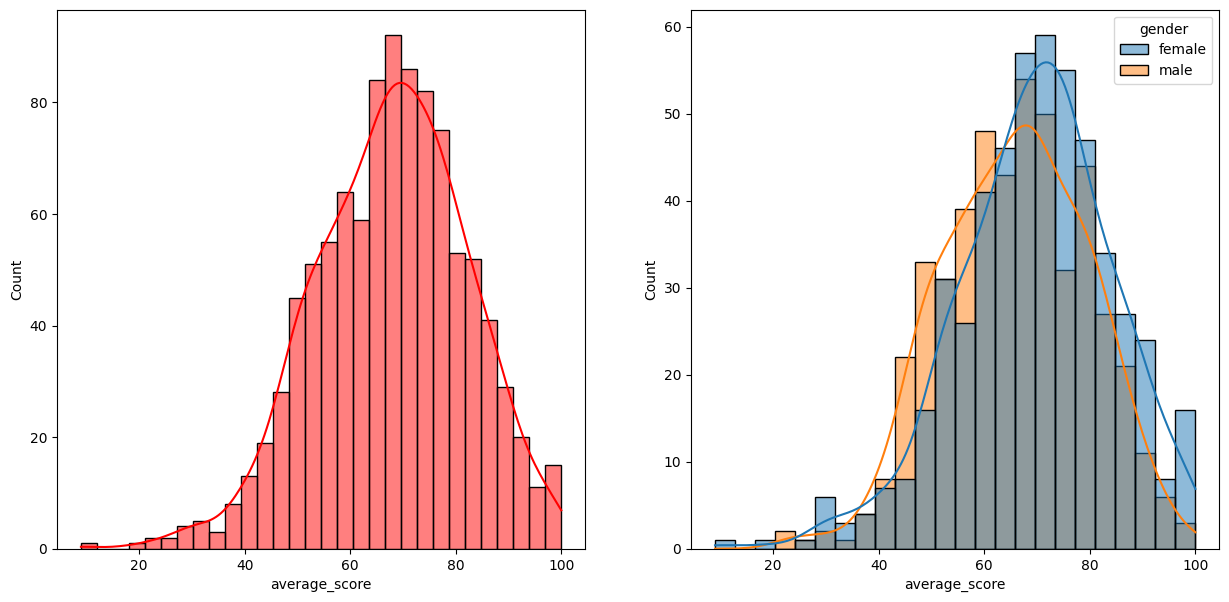

In [31]:
fig,axs= plt.subplots(1,2,figsize=(15,7))

plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='r')

plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')

plt.show()

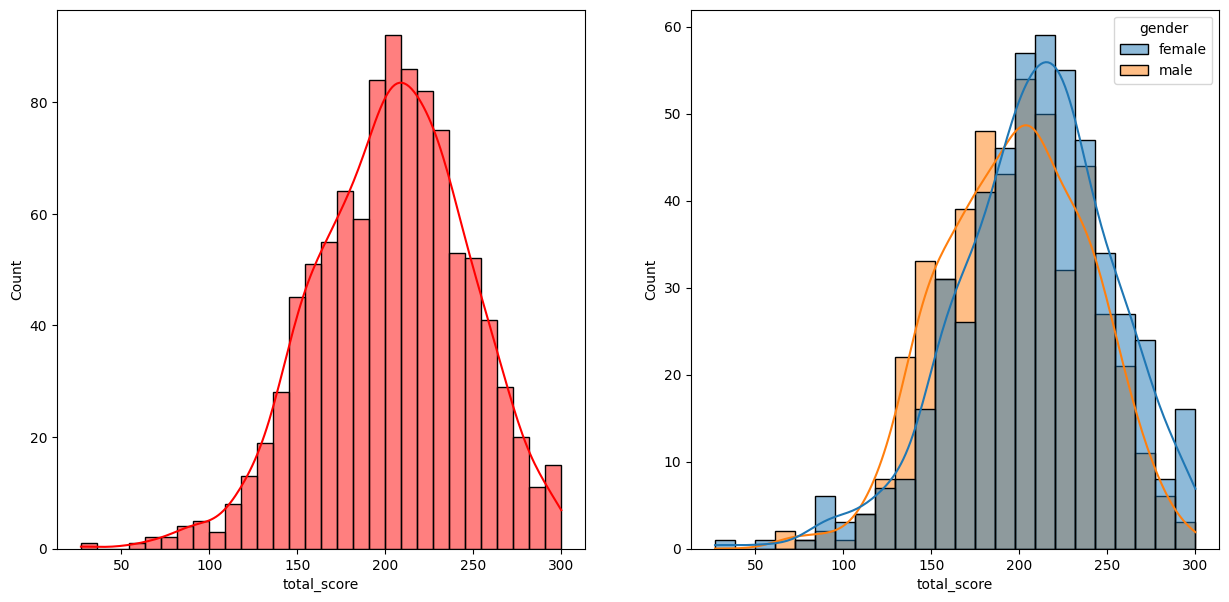

In [32]:
fig,axs= plt.subplots(1,2,figsize=(15,7))

plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='r')

plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')

plt.show()

#### Insights
- Female students tend to perform well then male students.